#  <font color=blue> ****Heart Disease Prediction Using Neural Networks**** </font>

## Introduction 

Heart disease remains one of the leading causes of morbidity and mortality worldwide, making early diagnosis crucial for effective treatment and management. This project aims to predict the likelihood of heart disease in patients by developing a neural network model trained on a dataset with 14 key medical and demographic attributes: age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise (oldpeak), the slope of the ST segment during peak exercise, number of major vessels colored by fluoroscopy (ca), and thalassemia status.


By leveraging deep learning, this project seeks to identify complex patterns and relationships within these attributes to accurately classify patients as having heart disease or not. This model has the potential to support healthcare professionals in diagnostic decision-making, allowing for earlier intervention and better-targeted treatment. Additionally, by examining the significance of various features in prediction, we can gain further insights into key factors contributing to heart disease, potentially guiding future research and preventive healthcare strategies


## About the dataset 

This dataset is multivariate, involving a variety of separate mathematical or statistical variables for analysis. It comprises 14 attributes: age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise relative to rest (oldpeak), the slope of the peak exercise ST segment, number of major vessels colored by fluoroscopy (ca), and thalassemia. Originally containing 76 attributes, ML researchers typically focus on this subset of 14 attributes from the Cleveland database. The primary objectives with this dataset are predicting whether a patient has heart disease based on these attributes and exploring insights to aid in understanding the problem further.

**Notebook Objectives**

 • Exploratory Data Analysis
 
 - understand the structure of the dataset
 
•	Visualization of the data

	- visualize the data

•	Data Preprocessing

	- handle missing values and outliers
	- encode categorical variables and scale features

	prepare data for modeling
    
•	Model tuning and building

	- Define Neural network model for predicting heart disease

•	Model evaluation 

	 evaluate the accuracy of  the model
     
•	Model Deployment

	prepare the model
	Save the model


## Importing the libraries

In [452]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.utils import shuffle
import tensorflow as tf
from sklearn.model_selection import train_test_split

 ## Exloratory Data Analysis( EDA)

In [453]:
df= pd.read_csv("https://raw.githubusercontent.com/AbaditEstif/Neural-Networks/refs/heads/main/heart_disease_uci.csv")

In [384]:
df.shape

(920, 16)

In [385]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


#### Handling Missing data
lets check missing values , if there is any missing value in the patient recored , we will drop the record altogether, drop the the rows with missing values . we will also shuffle the dataset inorder to have uniform distribution when we split the data into train and test set

In [386]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [387]:
df.dropna(inplace=True)
df= shuffle(df)

In [388]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [389]:
df.shape

(299, 16)

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 152 to 48
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    object 
 3   dataset   299 non-null    object 
 4   cp        299 non-null    object 
 5   trestbps  299 non-null    float64
 6   chol      299 non-null    float64
 7   fbs       299 non-null    object 
 8   restecg   299 non-null    object 
 9   thalch    299 non-null    float64
 10  exang     299 non-null    object 
 11  oldpeak   299 non-null    float64
 12  slope     299 non-null    object 
 13  ca        299 non-null    float64
 14  thal      299 non-null    object 
 15  num       299 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 39.7+ KB


In [391]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [392]:
df['cp'].value_counts()

cp
asymptomatic       144
non-anginal         83
atypical angina     49
typical angina      23
Name: count, dtype: int64

In [393]:
df['num'].value_counts()

num
0    160
1     56
2     35
3     35
4     13
Name: count, dtype: int64

In [394]:
df['dataset'].value_counts()

dataset
Cleveland        297
VA Long Beach      1
Hungary            1
Name: count, dtype: int64

In [395]:
df['restecg'].value_counts()

restecg
normal              149
lv hypertrophy      146
st-t abnormality      4
Name: count, dtype: int64

In [396]:
df['slope'].value_counts()

slope
flat           139
upsloping      139
downsloping     21
Name: count, dtype: int64

In [397]:
df['thal'].value_counts()

thal
normal               164
reversable defect    117
fixed defect          18
Name: count, dtype: int64

##### Renaming the columns

In [398]:
df.columns=['id','age','sex','study_location','chest_pain_type','resting_bloodpressure','cholestrol','fasting_bldsgr',
            'resting_esg','max_heartrate','exercise','st_depression','slope','major_vessel_colored','thal','condition']

In [399]:
df.head()

,id,age,sex,study_location,chest_pain_type,resting_bloodpressure,cholestrol,fasting_bldsgr,resting_esg,max_heartrate,exercise,st_depression,slope,major_vessel_colored,thal,condition
152,153,67,Female,Cleveland,non-anginal,115.0,564.0,False,lv hypertrophy,160.0,False,1.6,flat,0.0,reversable defect,0
253,254,51,Female,Cleveland,non-anginal,120.0,295.0,False,lv hypertrophy,157.0,False,0.6,upsloping,0.0,normal,0
55,56,54,Male,Cleveland,asymptomatic,124.0,266.0,False,lv hypertrophy,109.0,True,2.2,flat,1.0,reversable defect,1
37,38,57,Male,Cleveland,asymptomatic,150.0,276.0,False,lv hypertrophy,112.0,True,0.6,flat,1.0,fixed defect,1
161,162,77,Male,Cleveland,asymptomatic,125.0,304.0,False,lv hypertrophy,162.0,True,0.0,upsloping,3.0,normal,4


 ## Display descriptive statistics

In [400]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,299.0,153.872910,95.896287,1.0,75.5,151.0,227.5,749.0
age,299.0,54.521739,9.030264,29.0,48.0,56.0,61.0,77.0
resting_bloodpressure,299.0,131.715719,17.747751,94.0,120.0,130.0,140.0,200.0
cholestrol,299.0,246.785953,52.532582,100.0,211.0,242.0,275.5,564.0
max_heartrate,299.0,149.327759,23.121062,71.0,132.5,152.0,165.5,202.0
st_depression,299.0,1.058528,1.162769,0.0,0.0,0.8,1.6,6.2
major_vessel_colored,299.0,0.672241,0.937438,0.0,0.0,0.0,1.0,3.0
condition,299.0,0.946488,1.230409,0.0,0.0,0.0,2.0,4.0


In [401]:
df['condition'].value_counts()

condition
0    160
1     56
2     35
3     35
4     13
Name: count, dtype: int64

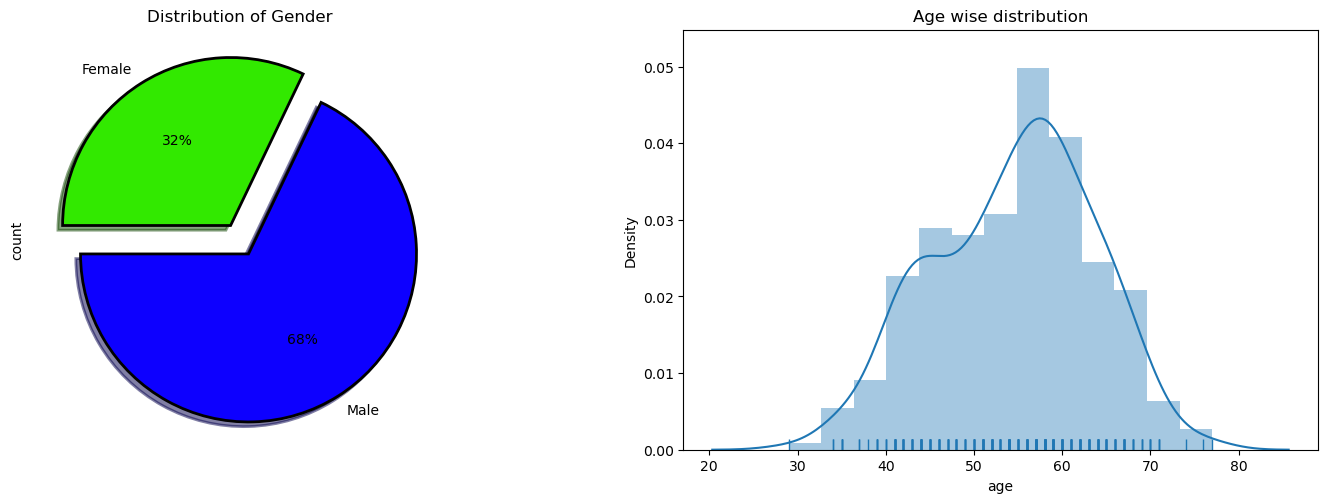

In [402]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df['sex'].value_counts().plot.pie(autopct='%1.0f%%',colors=sns.color_palette('prism',5),startangle=900,labels
    =['Male','Female'],wedgeprops={'linewidth':2,'edgecolor':'k'},explode=[.1,.1],shadow=True)
plt.title('Distribution of Gender')
plt.subplot(222)
ax= sns.distplot(df['age'],rug=True)
plt.title('Age wise distribution')
plt.show()


In [403]:
 # compare condition column with sex column
    
pd.crosstab(df.condition,df.sex)

sex,Female,Male
condition,,
0,71,89
1,9,47
2,7,28
3,7,28
4,2,11


##### create a bar plot to visualize the condition between the two genders

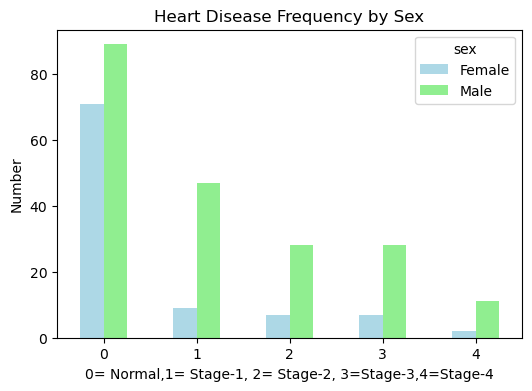

In [404]:
pd.crosstab(df.condition,df.sex).plot(kind='bar',figsize=(6,4),color=['lightblue','lightgreen'])
plt.title('Heart Disease Frequency by Sex')
plt.xlabel('0= Normal,1= Stage-1, 2= Stage-2, 3=Stage-3,4=Stage-4')
plt.ylabel('Number')
plt.xticks(rotation=0)
plt.show()

#### Heart disease frequency by Chest pain Type

In [405]:
pd.crosstab(df.chest_pain_type,df.condition)

condition,0,1,2,3,4
chest_pain_type,,,,,
asymptomatic,39,36,29,29,11
atypical angina,40,6,1,2,0
non-anginal,65,9,4,4,1
typical angina,16,5,1,0,1


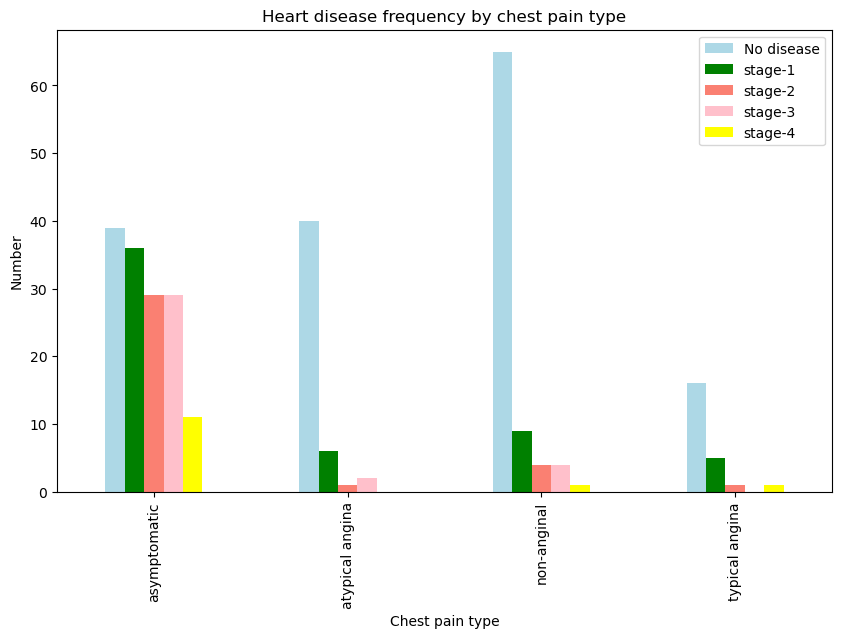

In [406]:
pd.crosstab(df.chest_pain_type,df.condition).plot(kind='bar',figsize=(10,6),color=['lightblue','green','salmon','pink','yellow'])
plt.title('Heart disease frequency by chest pain type')
plt.ylabel('Number')
plt.xlabel('Chest pain type')
plt.legend(['No disease','stage-1','stage-2','stage-3','stage-4'])
plt.show()

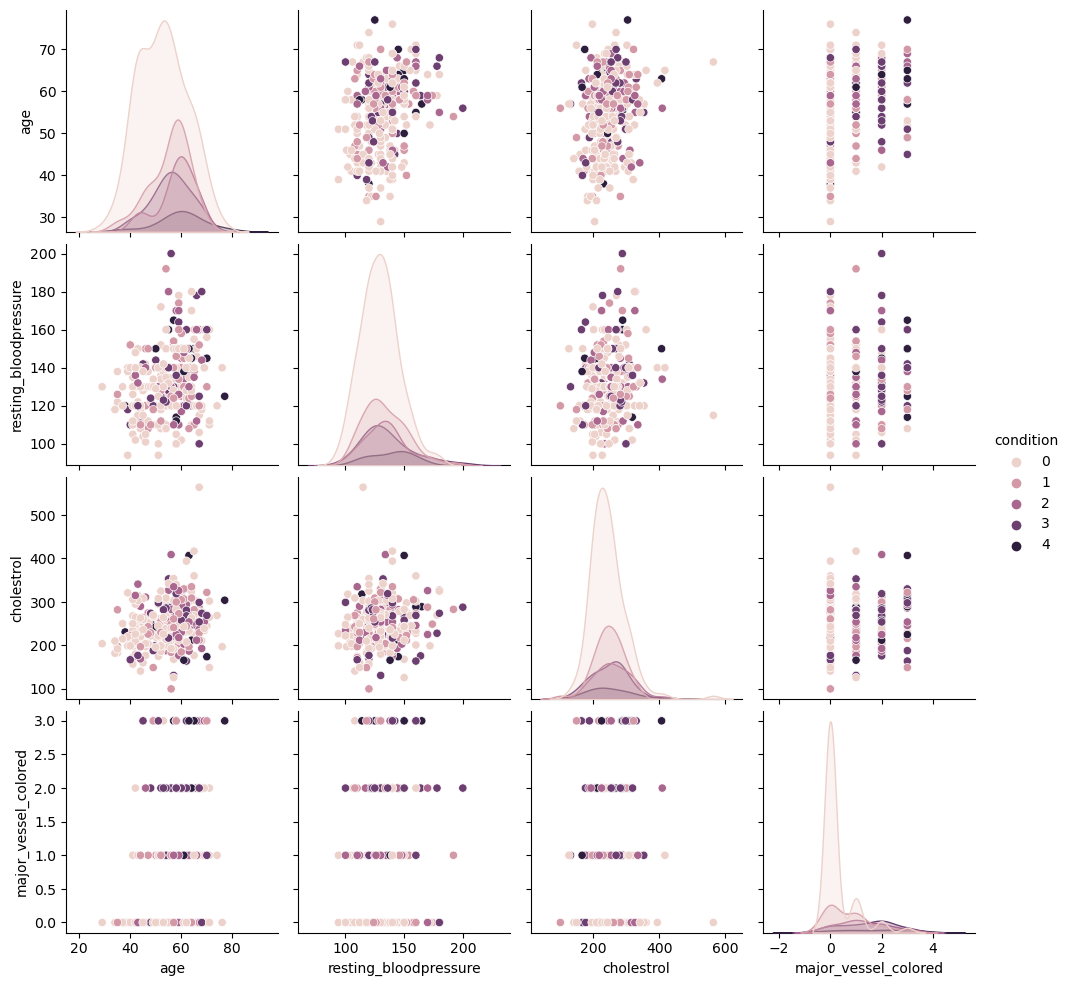

In [407]:
sns.pairplot(df,hue= 'condition', vars=['age','resting_bloodpressure','cholestrol','major_vessel_colored'])

In [408]:
df['thal'].value_counts()

thal
normal               164
reversable defect    117
fixed defect          18
Name: count, dtype: int64

In [409]:
df['thal'].replace({'fixed defect':'fixed_defect','reversable defect':'reversable_defect',}, inplace= True)

In [410]:
df['thal'].value_counts()

thal
normal               164
reversable_defect    117
fixed_defect          18
Name: count, dtype: int64

In [411]:
df['chest_pain_type'].value_counts()

chest_pain_type
asymptomatic       144
non-anginal         83
atypical angina     49
typical angina      23
Name: count, dtype: int64

In [412]:
df['chest_pain_type'].replace({'typical angina':'typical_angina','atypical angina':'atypical_angina'},inplace=True)

In [413]:
df.head()

,id,age,sex,study_location,chest_pain_type,resting_bloodpressure,cholestrol,fasting_bldsgr,resting_esg,max_heartrate,exercise,st_depression,slope,major_vessel_colored,thal,condition
152,153,67,Female,Cleveland,non-anginal,115.0,564.0,False,lv hypertrophy,160.0,False,1.6,flat,0.0,reversable_defect,0
253,254,51,Female,Cleveland,non-anginal,120.0,295.0,False,lv hypertrophy,157.0,False,0.6,upsloping,0.0,normal,0
55,56,54,Male,Cleveland,asymptomatic,124.0,266.0,False,lv hypertrophy,109.0,True,2.2,flat,1.0,reversable_defect,1
37,38,57,Male,Cleveland,asymptomatic,150.0,276.0,False,lv hypertrophy,112.0,True,0.6,flat,1.0,fixed_defect,1
161,162,77,Male,Cleveland,asymptomatic,125.0,304.0,False,lv hypertrophy,162.0,True,0.0,upsloping,3.0,normal,4


In [414]:
df['condition']= ((df['condition']>0)*1)
df['sex']=(df['sex']== 'Male')*1
df['exercise']= (df['exercise'])*1
df['fasting_bldsgr'] = (df['fasting_bldsgr'])*1
df.drop(['study_location'], axis=1, inplace = True)


In [415]:
df.head()

,id,age,sex,chest_pain_type,resting_bloodpressure,cholestrol,fasting_bldsgr,resting_esg,max_heartrate,exercise,st_depression,slope,major_vessel_colored,thal,condition
152,153,67,0,non-anginal,115.0,564.0,0,lv hypertrophy,160.0,0,1.6,flat,0.0,reversable_defect,0
253,254,51,0,non-anginal,120.0,295.0,0,lv hypertrophy,157.0,0,0.6,upsloping,0.0,normal,0
55,56,54,1,asymptomatic,124.0,266.0,0,lv hypertrophy,109.0,1,2.2,flat,1.0,reversable_defect,1
37,38,57,1,asymptomatic,150.0,276.0,0,lv hypertrophy,112.0,1,0.6,flat,1.0,fixed_defect,1
161,162,77,1,asymptomatic,125.0,304.0,0,lv hypertrophy,162.0,1,0.0,upsloping,3.0,normal,1


In [416]:
df['condition'].value_counts()

condition
0    160
1    139
Name: count, dtype: int64

In [417]:
#the dataset is too small to be useful for deep learning so we will oversample it to triple its size

#for i in range(1,3):
    # df= df._append(df)

In [418]:
df.shape

(299, 15)

## Feature Engineering

#### One-hot Encoding

In [419]:
df= pd.get_dummies(df, columns=['chest_pain_type','slope','thal','resting_esg'])


In [420]:
df.columns

Index(['id', 'age', 'sex', 'resting_bloodpressure', 'cholestrol',
       'fasting_bldsgr', 'max_heartrate', 'exercise', 'st_depression',
       'major_vessel_colored', 'condition', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical_angina', 'chest_pain_type_non-anginal',
       'chest_pain_type_typical_angina', 'slope_downsloping', 'slope_flat',
       'slope_upsloping', 'thal_fixed_defect', 'thal_normal',
       'thal_reversable_defect', 'resting_esg_lv hypertrophy',
       'resting_esg_normal', 'resting_esg_st-t abnormality'],
      dtype='object')

In [421]:
df.head()

,id,age,sex,resting_bloodpressure,cholestrol,fasting_bldsgr,max_heartrate,exercise,st_depression,major_vessel_colored,...,chest_pain_type_typical_angina,slope_downsloping,slope_flat,slope_upsloping,thal_fixed_defect,thal_normal,thal_reversable_defect,resting_esg_lv hypertrophy,resting_esg_normal,resting_esg_st-t abnormality
152,153,67,0,115.0,564.0,0,160.0,0,1.6,0.0,...,False,False,True,False,False,False,True,True,False,False
253,254,51,0,120.0,295.0,0,157.0,0,0.6,0.0,...,False,False,False,True,False,True,False,True,False,False
55,56,54,1,124.0,266.0,0,109.0,1,2.2,1.0,...,False,False,True,False,False,False,True,True,False,False
37,38,57,1,150.0,276.0,0,112.0,1,0.6,1.0,...,False,False,True,False,True,False,False,True,False,False
161,162,77,1,125.0,304.0,0,162.0,1,0.0,3.0,...,False,False,False,True,False,True,False,True,False,False


In [422]:
#the dataset is too small to be useful for deep learning so we will oversample it to triple its size

for i in range(1,3):
     df= df._append(df)
    

In [423]:
sample= df.sample(10)

In [424]:
sample

,id,age,sex,resting_bloodpressure,cholestrol,fasting_bldsgr,max_heartrate,exercise,st_depression,major_vessel_colored,...,chest_pain_type_typical_angina,slope_downsloping,slope_flat,slope_upsloping,thal_fixed_defect,thal_normal,thal_reversable_defect,resting_esg_lv hypertrophy,resting_esg_normal,resting_esg_st-t abnormality
270,271,61,1,140.0,207.0,0,138.0,1,1.9,1.0,...,False,False,False,True,False,False,True,True,False,False
58,59,54,1,125.0,273.0,0,152.0,0,0.5,1.0,...,False,True,False,False,False,True,False,True,False,False
298,299,45,1,110.0,264.0,0,132.0,0,1.2,0.0,...,True,False,True,False,False,False,True,False,True,False
270,271,61,1,140.0,207.0,0,138.0,1,1.9,1.0,...,False,False,False,True,False,False,True,True,False,False
39,40,61,1,150.0,243.0,1,137.0,1,1.0,0.0,...,False,False,True,False,False,True,False,False,True,False
94,95,63,0,135.0,252.0,0,172.0,0,0.0,0.0,...,False,False,False,True,False,True,False,True,False,False
59,60,51,1,125.0,213.0,0,125.0,1,1.4,1.0,...,True,False,False,True,False,True,False,True,False,False
290,291,67,1,152.0,212.0,0,150.0,0,0.8,0.0,...,False,False,True,False,False,False,True,True,False,False
34,35,44,1,130.0,233.0,0,179.0,1,0.4,0.0,...,False,False,False,True,False,True,False,False,True,False
204,205,43,1,110.0,211.0,0,161.0,0,0.0,0.0,...,False,False,False,True,False,False,True,False,True,False


In [425]:
df.shape

(1196, 24)

In [426]:
df.columns

Index(['id', 'age', 'sex', 'resting_bloodpressure', 'cholestrol',
       'fasting_bldsgr', 'max_heartrate', 'exercise', 'st_depression',
       'major_vessel_colored', 'condition', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical_angina', 'chest_pain_type_non-anginal',
       'chest_pain_type_typical_angina', 'slope_downsloping', 'slope_flat',
       'slope_upsloping', 'thal_fixed_defect', 'thal_normal',
       'thal_reversable_defect', 'resting_esg_lv hypertrophy',
       'resting_esg_normal', 'resting_esg_st-t abnormality'],
      dtype='object')

In [427]:
x= df.drop(['condition'],axis= 1)
y=df['condition']

<Axes: title={'center': 'Correlation with Diabetes'}>

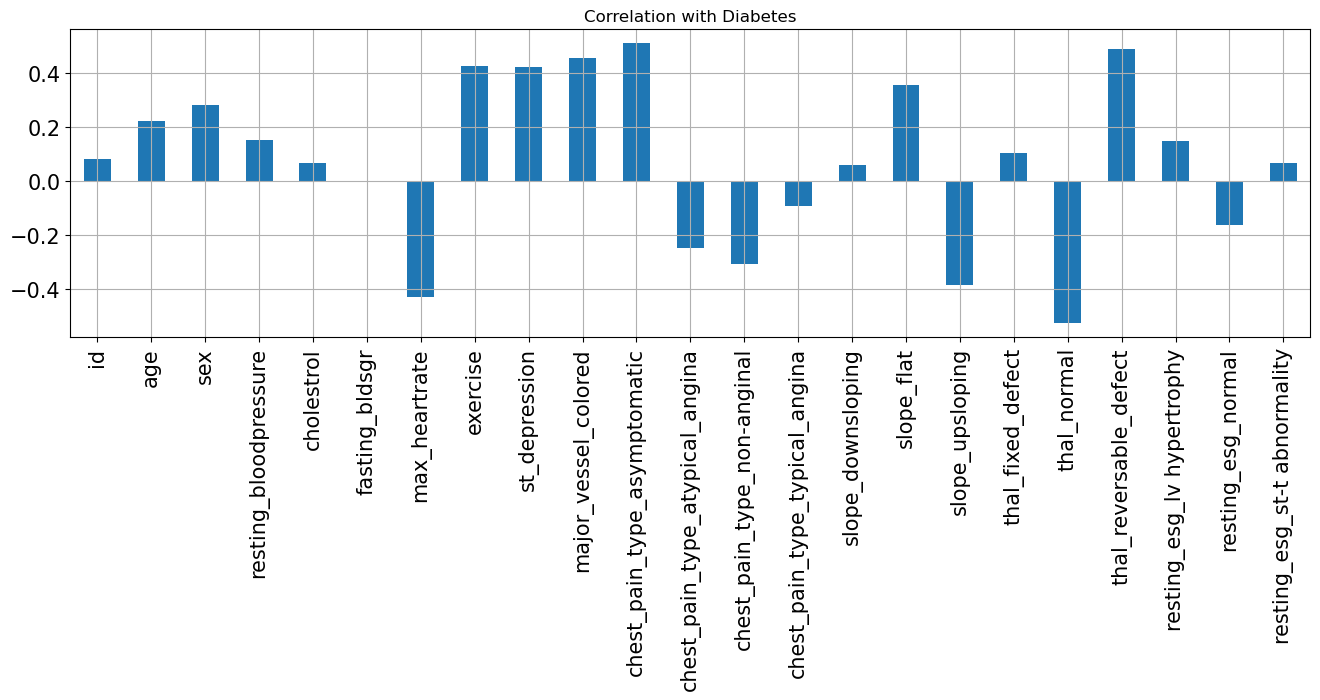

In [428]:
x.corrwith(y).plot.bar(
         figsize=(16,4),title='Correlation with Diabetes',fontsize=15,
           rot=90,grid=True)

### Model building 

In [429]:
# spliting the data 70%-30%  training set  and test set

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=41)

In [430]:
print('---- -----Training set--------')
print(x_train.shape)
print(y_train.shape)

---- -----Training set--------
(837, 23)
(837,)


In [431]:
print('------- Test set-------')
print(x_test.shape)
print(y_test.shape)

------- Test set-------
(359, 23)
(359,)


In [432]:
print('distribuiton of condition variable in training set')
print(y_train.value_counts())

distribuiton of condition variable in training set
condition
0    451
1    386
Name: count, dtype: int64


In [433]:
print('distribution of condition varaible in test set')
print(y_test.value_counts())

distribution of condition varaible in test set
condition
0    189
1    170
Name: count, dtype: int64


## Feature Scaling

In [434]:
# Deep learning models work best when features are on similar scales so we will use standardsclaer from sklearn

from sklearn.preprocessing import StandardScaler

In [435]:
sc= StandardScaler()

In [436]:
x_train=sc.fit_transform(x_train)
x_test= sc.transform(x_test)

 **Define a neural network**

Now we are ready to difine our neural network. we will create a netwrok that consists fo 4 fully connected layers:
- An input layer that receives an input value for each feature and apply ReLU activation.
- 2 hidden layer that receives 100 inputs and applies ReLU activation funtion.
- An output layer that uses sigmoid activation funciton to generate an output for each patient (wich represents the classification probabilities for each patient whether he/she has heart disease or not)



## Part 2 -Building  a neural network 

In [437]:
from keras.models import Sequential
from keras.layers import Dense

In [438]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=100, activation ='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))


**Train the model**

To train the model,we need to repeatedly feed the training values forward through the network , uses a loss function to calculate the loss, we use optimizer to backpropagate the weight and bias value adjustments,and validate the model using the test data we withheld.
 
To do this we will  train and optimize the model, and test the model. Then we will call the model iteratively over 25 epochs ,logging the loss and accuracy statistics fro each epoch.


In [439]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

In [440]:
model.fit(x_train,y_train,batch_size=32, epochs=25)

Epoch 1/25
27/27 [==============================] - 1s 2ms/step - loss: 0.4501 - accuracy: 0.8244
Epoch 2/25
27/27 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8757
Epoch 3/25
27/27 [==============================] - 0s 3ms/step - loss: 0.2760 - accuracy: 0.8865
Epoch 4/25
27/27 [==============================] - 0s 3ms/step - loss: 0.2473 - accuracy: 0.8973
Epoch 5/25
27/27 [==============================] - 0s 3ms/step - loss: 0.2184 - accuracy: 0.9259
Epoch 6/25
27/27 [==============================] - 0s 3ms/step - loss: 0.1934 - accuracy: 0.9235
Epoch 7/25
27/27 [==============================] - 0s 3ms/step - loss: 0.1703 - accuracy: 0.9462
Epoch 8/25
27/27 [==============================] - 0s 3ms/step - loss: 0.1501 - accuracy: 0.9474
Epoch 9/25
27/27 [==============================] - 0s 3ms/step - loss: 0.1338 - accuracy: 0.9582
Epoch 10/25
27/27 [==============================] - 0s 3ms/step - loss: 0.1144 - accuracy: 0.9677
Epoch 11/25
27/27 [

## Review training and validation loss

After training is complete, we can examine the loss metrics we recoreded while training and validating the model. we are looking for two things:

- the loss should reduce with each epoch, showing that the model is learning the right weights and biases to predict the correct labels.
- the training loss and validation loss should follow a similar trend ,showing that the model is not overfitting to the training data.

In [441]:
y_pred=model.predict(x_test)
y_pred =(y_pred>0.5)

12/12 [==============================] - 0s 3ms/step


In [442]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [443]:
cm=confusion_matrix(y_test,y_pred)

In [444]:
print(cm)

[[189   0]
 [  2 168]]


#### *Here is the interpretation of the confusion matrix* 

*True Positives (TP)*: 168 — cases where the model correctly predicted heart disease.

*True Negatives (TN)*: 189 — cases where the model correctly predicted no heart disease.

 *False Positives (FP)*: 0 — cases where the model incorrectly predicted heart disease when there wasn't any.
 
 *False Negatives (FN)*: 2 — cases where the model incorrectly predicted no heart disease when it was actually present.
 
**Summary**

The model is highly accurate, with an excellent balance between high recall (sensitivity) and specificity. This indicates strong predictive capability, with very few false positives and no false negatives, making it effective at both identifying heart disease.




In [445]:
val_loss, val_acc= model.evaluate(x_test,y_test)


12/12 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9944


#### **Interpretation**:

*Loss*- 0.0342: This low value suggests that the model's predictions are very close to the actual values, meaning it has learned well from the data and makes few errors

*Accuracy*- 0.9944: With an accuracy of 99.44%, the model correctly predicts the outcome for almost all test samples.  This suggests that the model generalizes well to unseen data and performs exceptionally in classification.

#### Evaluate the model performance

 how do we know the performace of the model? we can evaluate the accuracy and it indicates that it predicts pretty well. To dig a little deeper and compare the predictions for each possible class , we can visualize the performace of a model by creating confusion matrix that shows a crosstab of correct and incorrect predictions for each class. the confusion matrix indicating that there are more correct than incorrect prediction
 

#### save the trained model

In [446]:
model.save('epic_cond_reader.model')

INFO:tensorflow:Assets written to: epic_cond_reader.model\assets


In [447]:
new_model= tf.keras.models.load_model('epic_cond_reader.model')

## Use the trained model for prediction 
 When we use new heart disease observation , we can use the model to predict the disease

In [448]:
prediction = new_model.predict([x_test])

12/12 [==============================] - 0s 3ms/step


In [449]:
print(np.argmax(prediction[5]))

0


In [450]:
print(np.argmax(prediction[12]))

0
